In [1]:
#import libraries
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

import pandas as pd

import standardization as sd                                #Self written, Scikit-learn do have standardScaler which does the same.
import confusion_matrix

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

In [2]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_Noise_67.csv")
test_data = pd.read_csv("../ValidationData/neodata/fault_all_Noise_67.csv")
#train_data.head()

In [3]:
#Normalization / conditioning
standardizer = sd.standardization(train_data,'target')

trn = standardizer.transform(train_data)
tst = standardizer.transform(test_data)

#trn = train_data
#tst = test_data

targets = train_data['target'].unique().tolist()        # List of classes

labels_tst = test_data['target']


# Fittig the training data first

In [4]:
from sklearn import svm

clf = svm.SVC( kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf.fit(trn.drop('target',axis=1), trn['target'])



SVC(C=1000, decision_function_shape='ovo', gamma=0.01)

In [5]:
#predicting
predict = clf.predict(trn.drop('target',axis=1))


print(trn['target'].to_numpy())
print(predict)


[ 0  0  0 ... 20 20 20]
[ 8  8 18 ... 20 20 20]


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Training data : Accuracy 82.153%'}, xlabel='Predicted class', ylabel='True class'>)

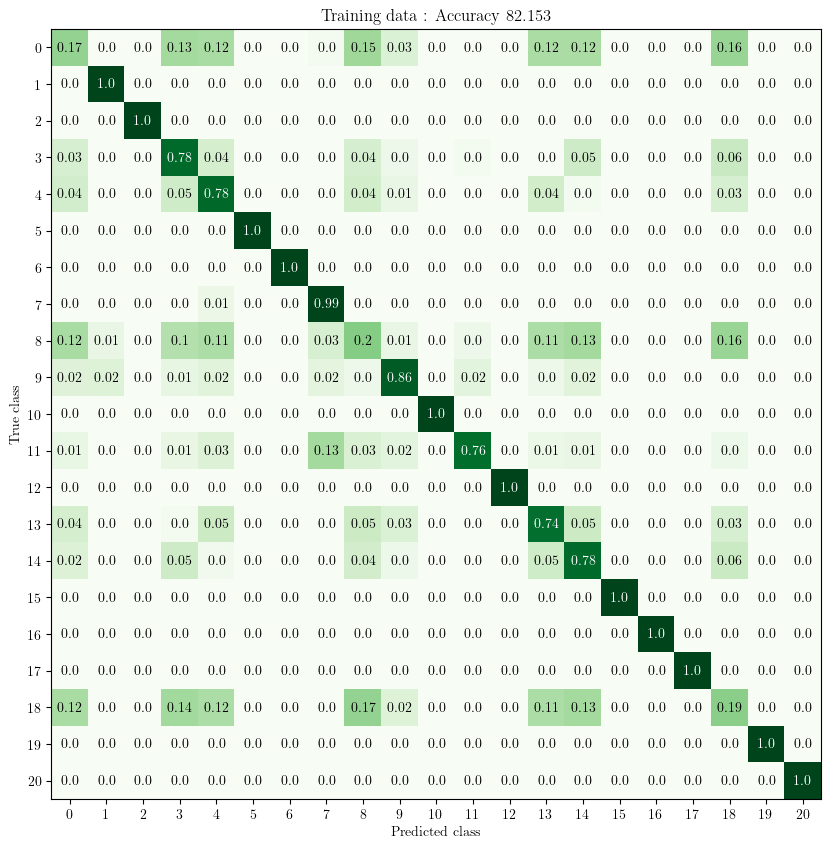

In [6]:

conf_matrix = np.zeros([21, 21])

for x,y in zip(predict,trn['target']):
    conf_matrix[int(y)][int(x)] +=1

    #Generate confusion matrix pdf
confusion_matrix.confusion_matrix(conf_matrix, figsize = (10,10), save_fig_name = 'SVM_train.pdf', title = 'Training data',eval_labels = False)



# Testing on validation data

In [7]:
predict = clf.predict(tst.drop('target',axis=1))

print(tst['target'].to_numpy())
print(predict)


[ 0  0  0 ... 20 20 20]
[ 9  3  9 ... 20 20 20]


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Validation data : Accuracy 68.301%'}, xlabel='Predicted class', ylabel='True class'>)

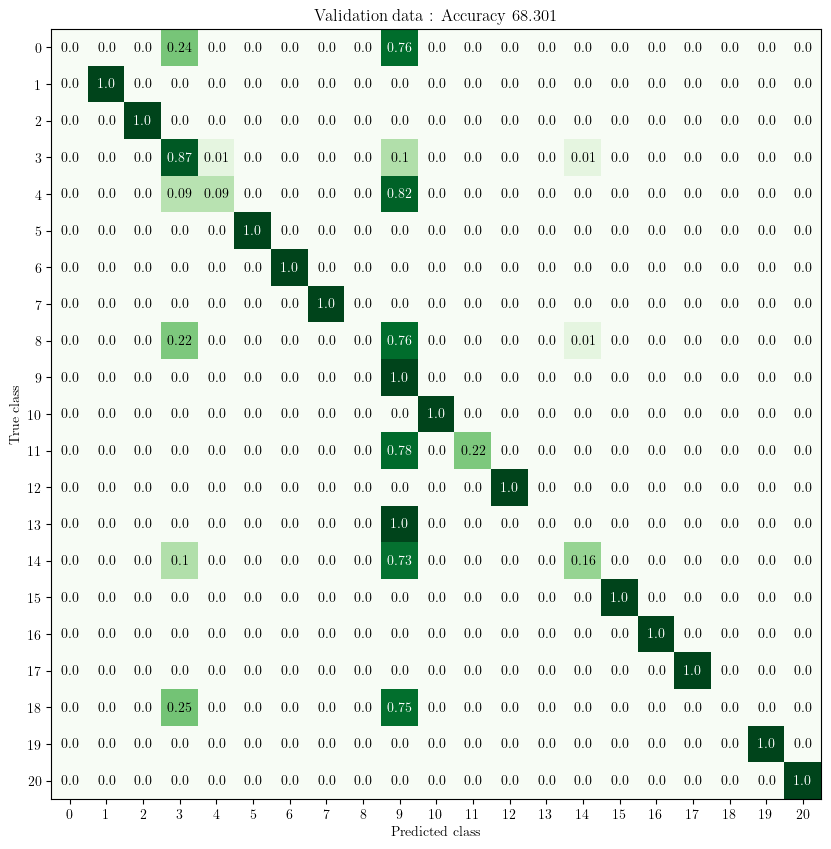

In [8]:
conf_matrix = np.zeros([21, 21])

for x,y in zip(predict,tst['target']):
    conf_matrix[int(y)][int(x)] +=1

    #Generate confusion matrix pdf
confusion_matrix.confusion_matrix(conf_matrix, figsize = (10,10), save_fig_name = 'SVM_val.pdf', title = 'Validation data',eval_labels = False)

With standardlization:

Traning: Accuracy = 82 %, False positive = 83 %
Validation: Accuracy = 68 %, False positive = 100 %

Without standardlization:

Traning: Accuracy = 90 %, False positive = 13 %
Validation: Accuracy = 36 %, False positive = 100 %